# quant-econ Solutions: On-the-Job Search

Solutions for http://quant-econ.net/jl/jv.html

In [2]:
using QuantEcon, QuantEcon.Models
using Grid
using PyPlot

## Exercise 1

Here's code to produce the 45 degree diagram

Computing value function
Compute iterate 10 with error 0.278323531332894
Compute iterate 20 with error 0.18485361111015042
Compute iterate 30 with error 0.12277387212213942
Compute iterate 40 with error 0.08154248967785449

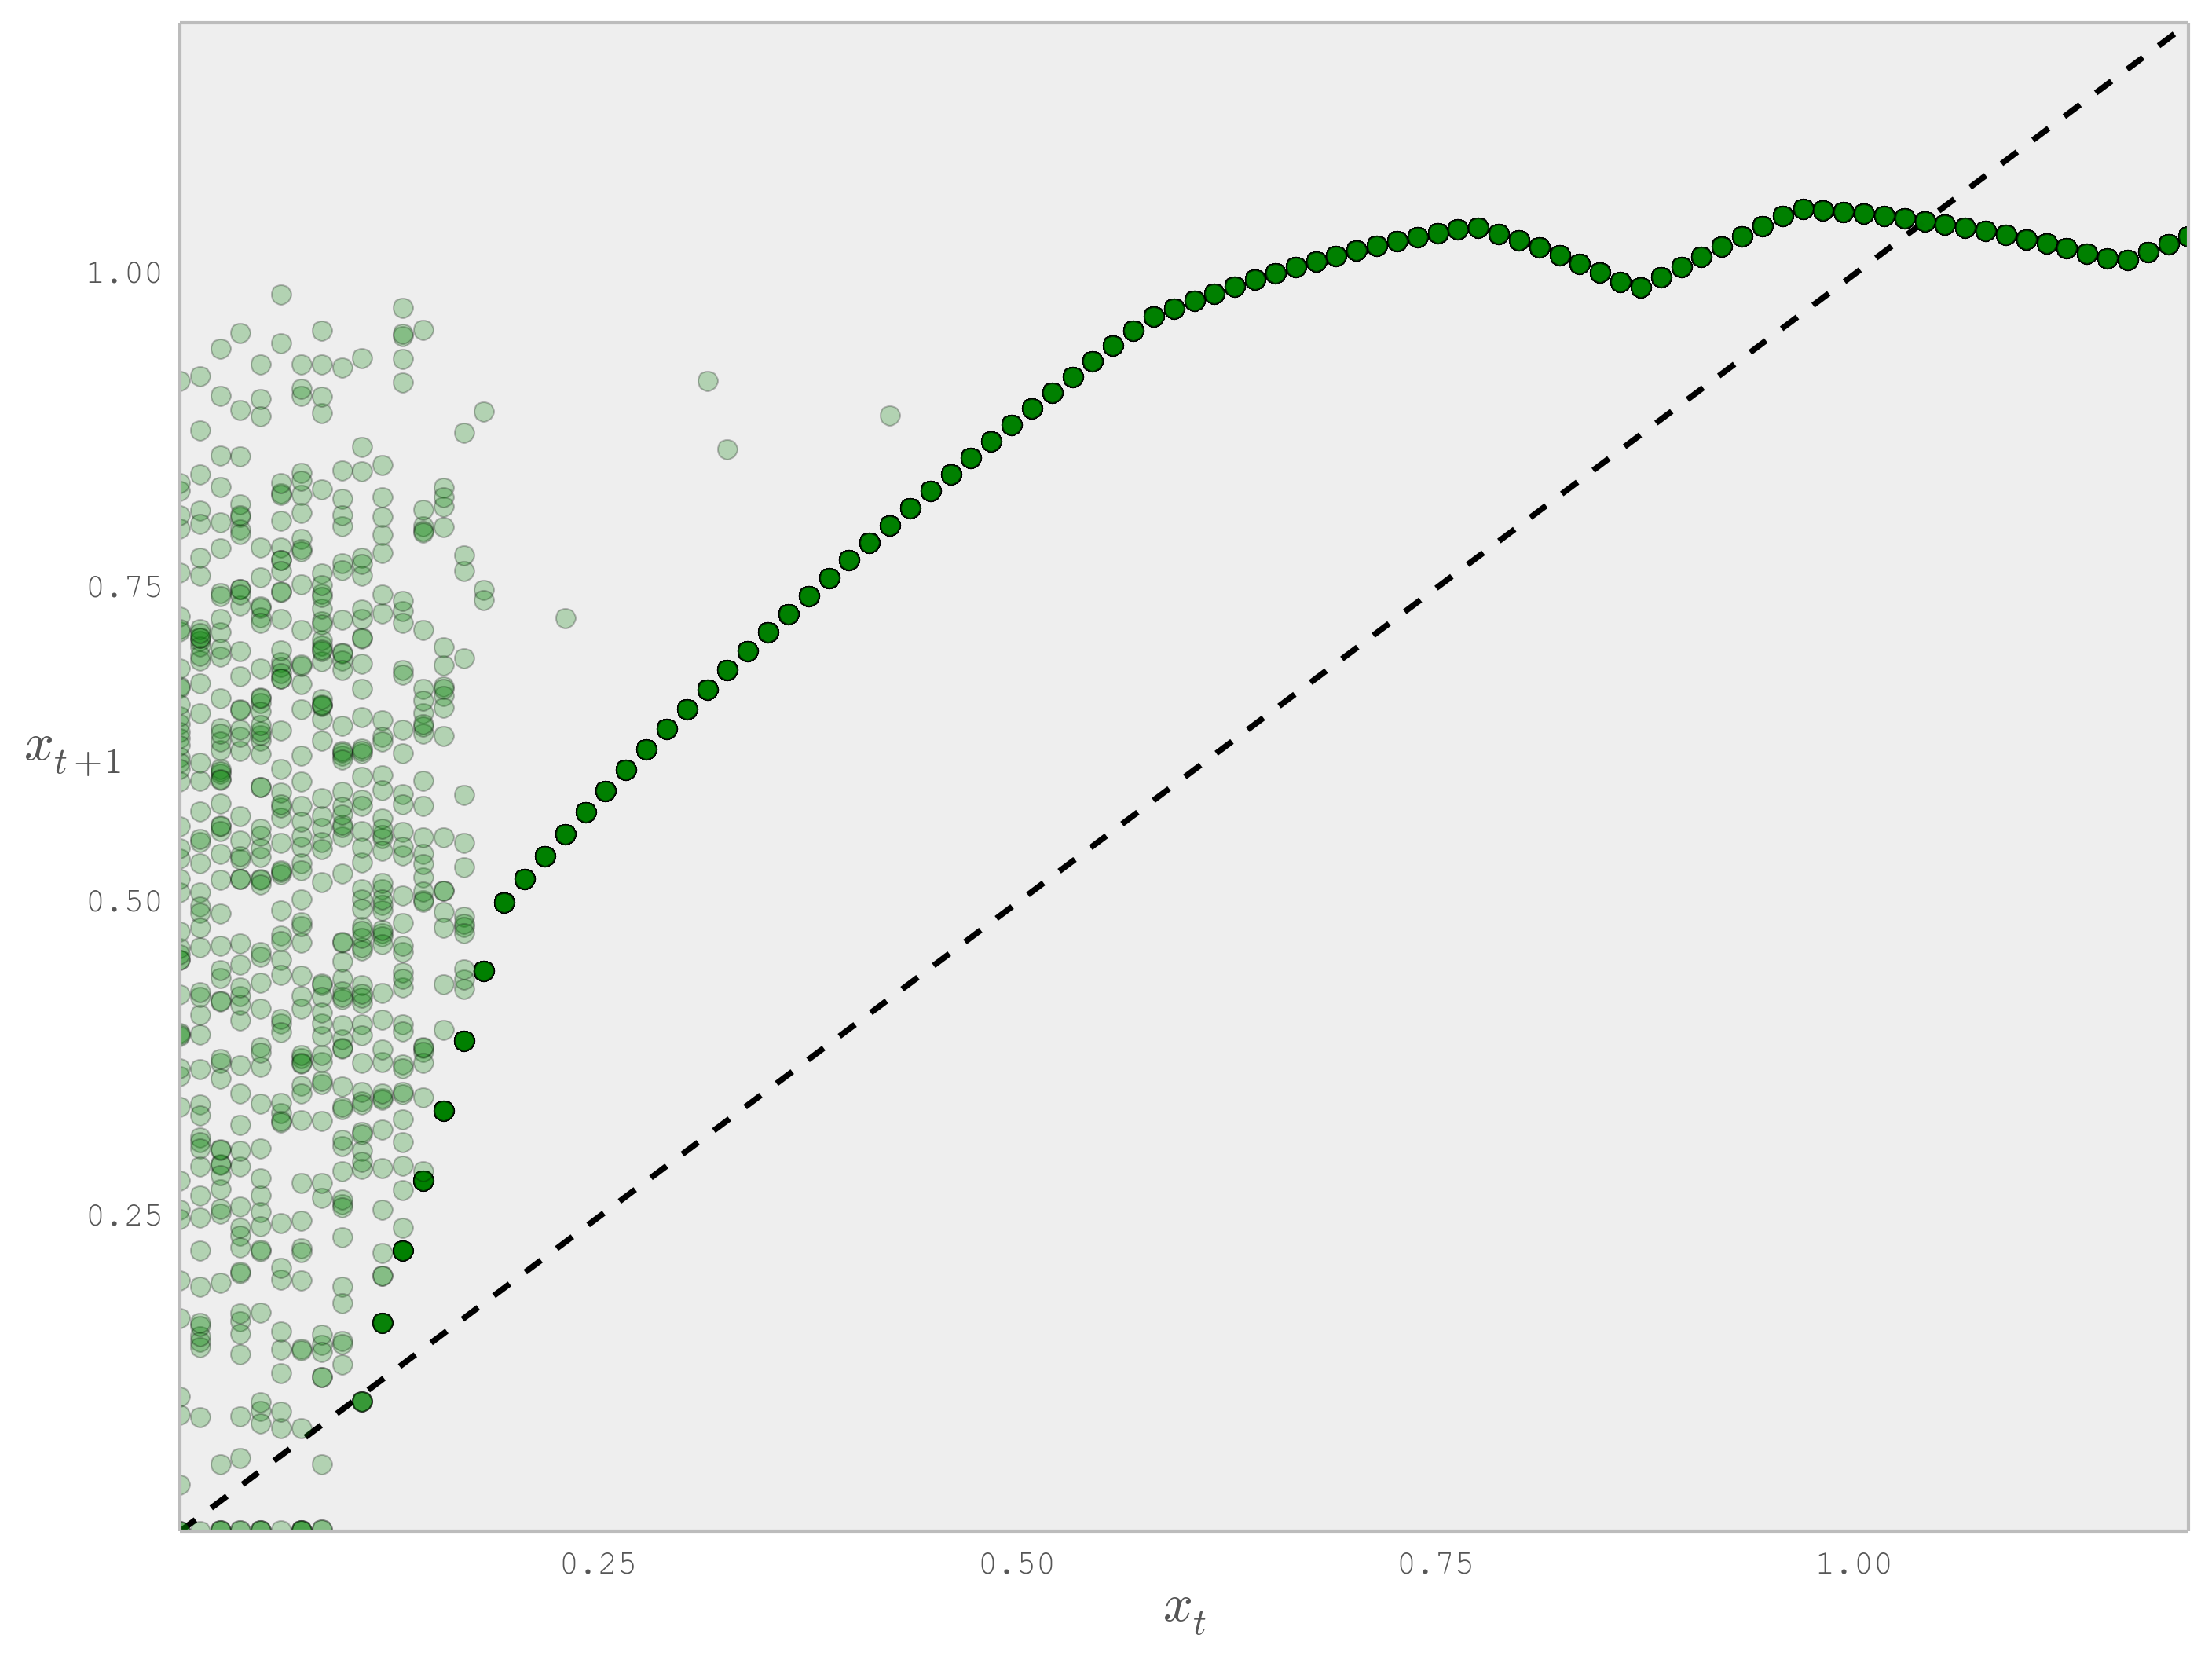


Computing policy functions


In [3]:
wp = JvWorker(grid_size=25)
G, pi_func, F = wp.G, wp.pi_func, wp.F       # Simplify names

v_init = [wp.x_grid * 0.5]
println("Computing value function")
f(x) = bellman_operator(wp, x)
V = compute_fixed_point(f, v_init, max_iter=40)
println("Computing policy functions")
s_policy, phi_policy = bellman_operator(wp, V, ret_policies=true)

# Turn the policy function arrays into CoordInterpGrid objects for interpolatino
s = CoordInterpGrid(wp.x_grid, s_policy, BCnearest, InterpLinear)
phi = CoordInterpGrid(wp.x_grid, phi_policy, BCnearest, InterpLinear)


h(x, b, U) = (1-b) * G(x, phi[x]) + b*max(G(x, phi[x]), U)

plot_grid_max, plot_grid_size = 1.2, 100
plot_grid = linspace(0, plot_grid_max, plot_grid_size)
fig, ax = subplots()
ax[:set_xlim](0, plot_grid_max)
ax[:set_ylim](0, plot_grid_max)
ticks = (0.25, 0.5, 0.75, 1.0)
ax[:set_xticks](ticks)
ax[:set_yticks](ticks)
ax[:set_xlabel](L"$x_t$", fontsize=16)
ax[:set_ylabel](L"$x_{t+1}$", fontsize=16, rotation="horizontal")

ax[:plot](plot_grid, plot_grid, "k--")

for x in plot_grid
    for i=1:50
        b = rand() < pi_func(s[x]) ? 1 : 0
        U = rand(wp.F)
        y = h(x, b, U)
        ax[:plot](x, y, "go", alpha=0.25)
    end
end

plt.show()

Looking at the dynamics, we can see that 

* If $x_t$ is below about 0.2 the dynamics are random, but $x_{t+1} > x_t$ is very likely
* As $x_t$ increases the dynamics become deterministic, and $x_t$ converges to a steady state value close to 1

Referring back to the figure here

http://quant-econ.net/jl/jv.html#solving-for-policies

we see that $x_t \approx 1$ means that $s_t = s(x_t) \approx 0$ and $\phi_t = \phi(x_t) \approx 0.6$



## Exercise 2

The figure can be produced as follows

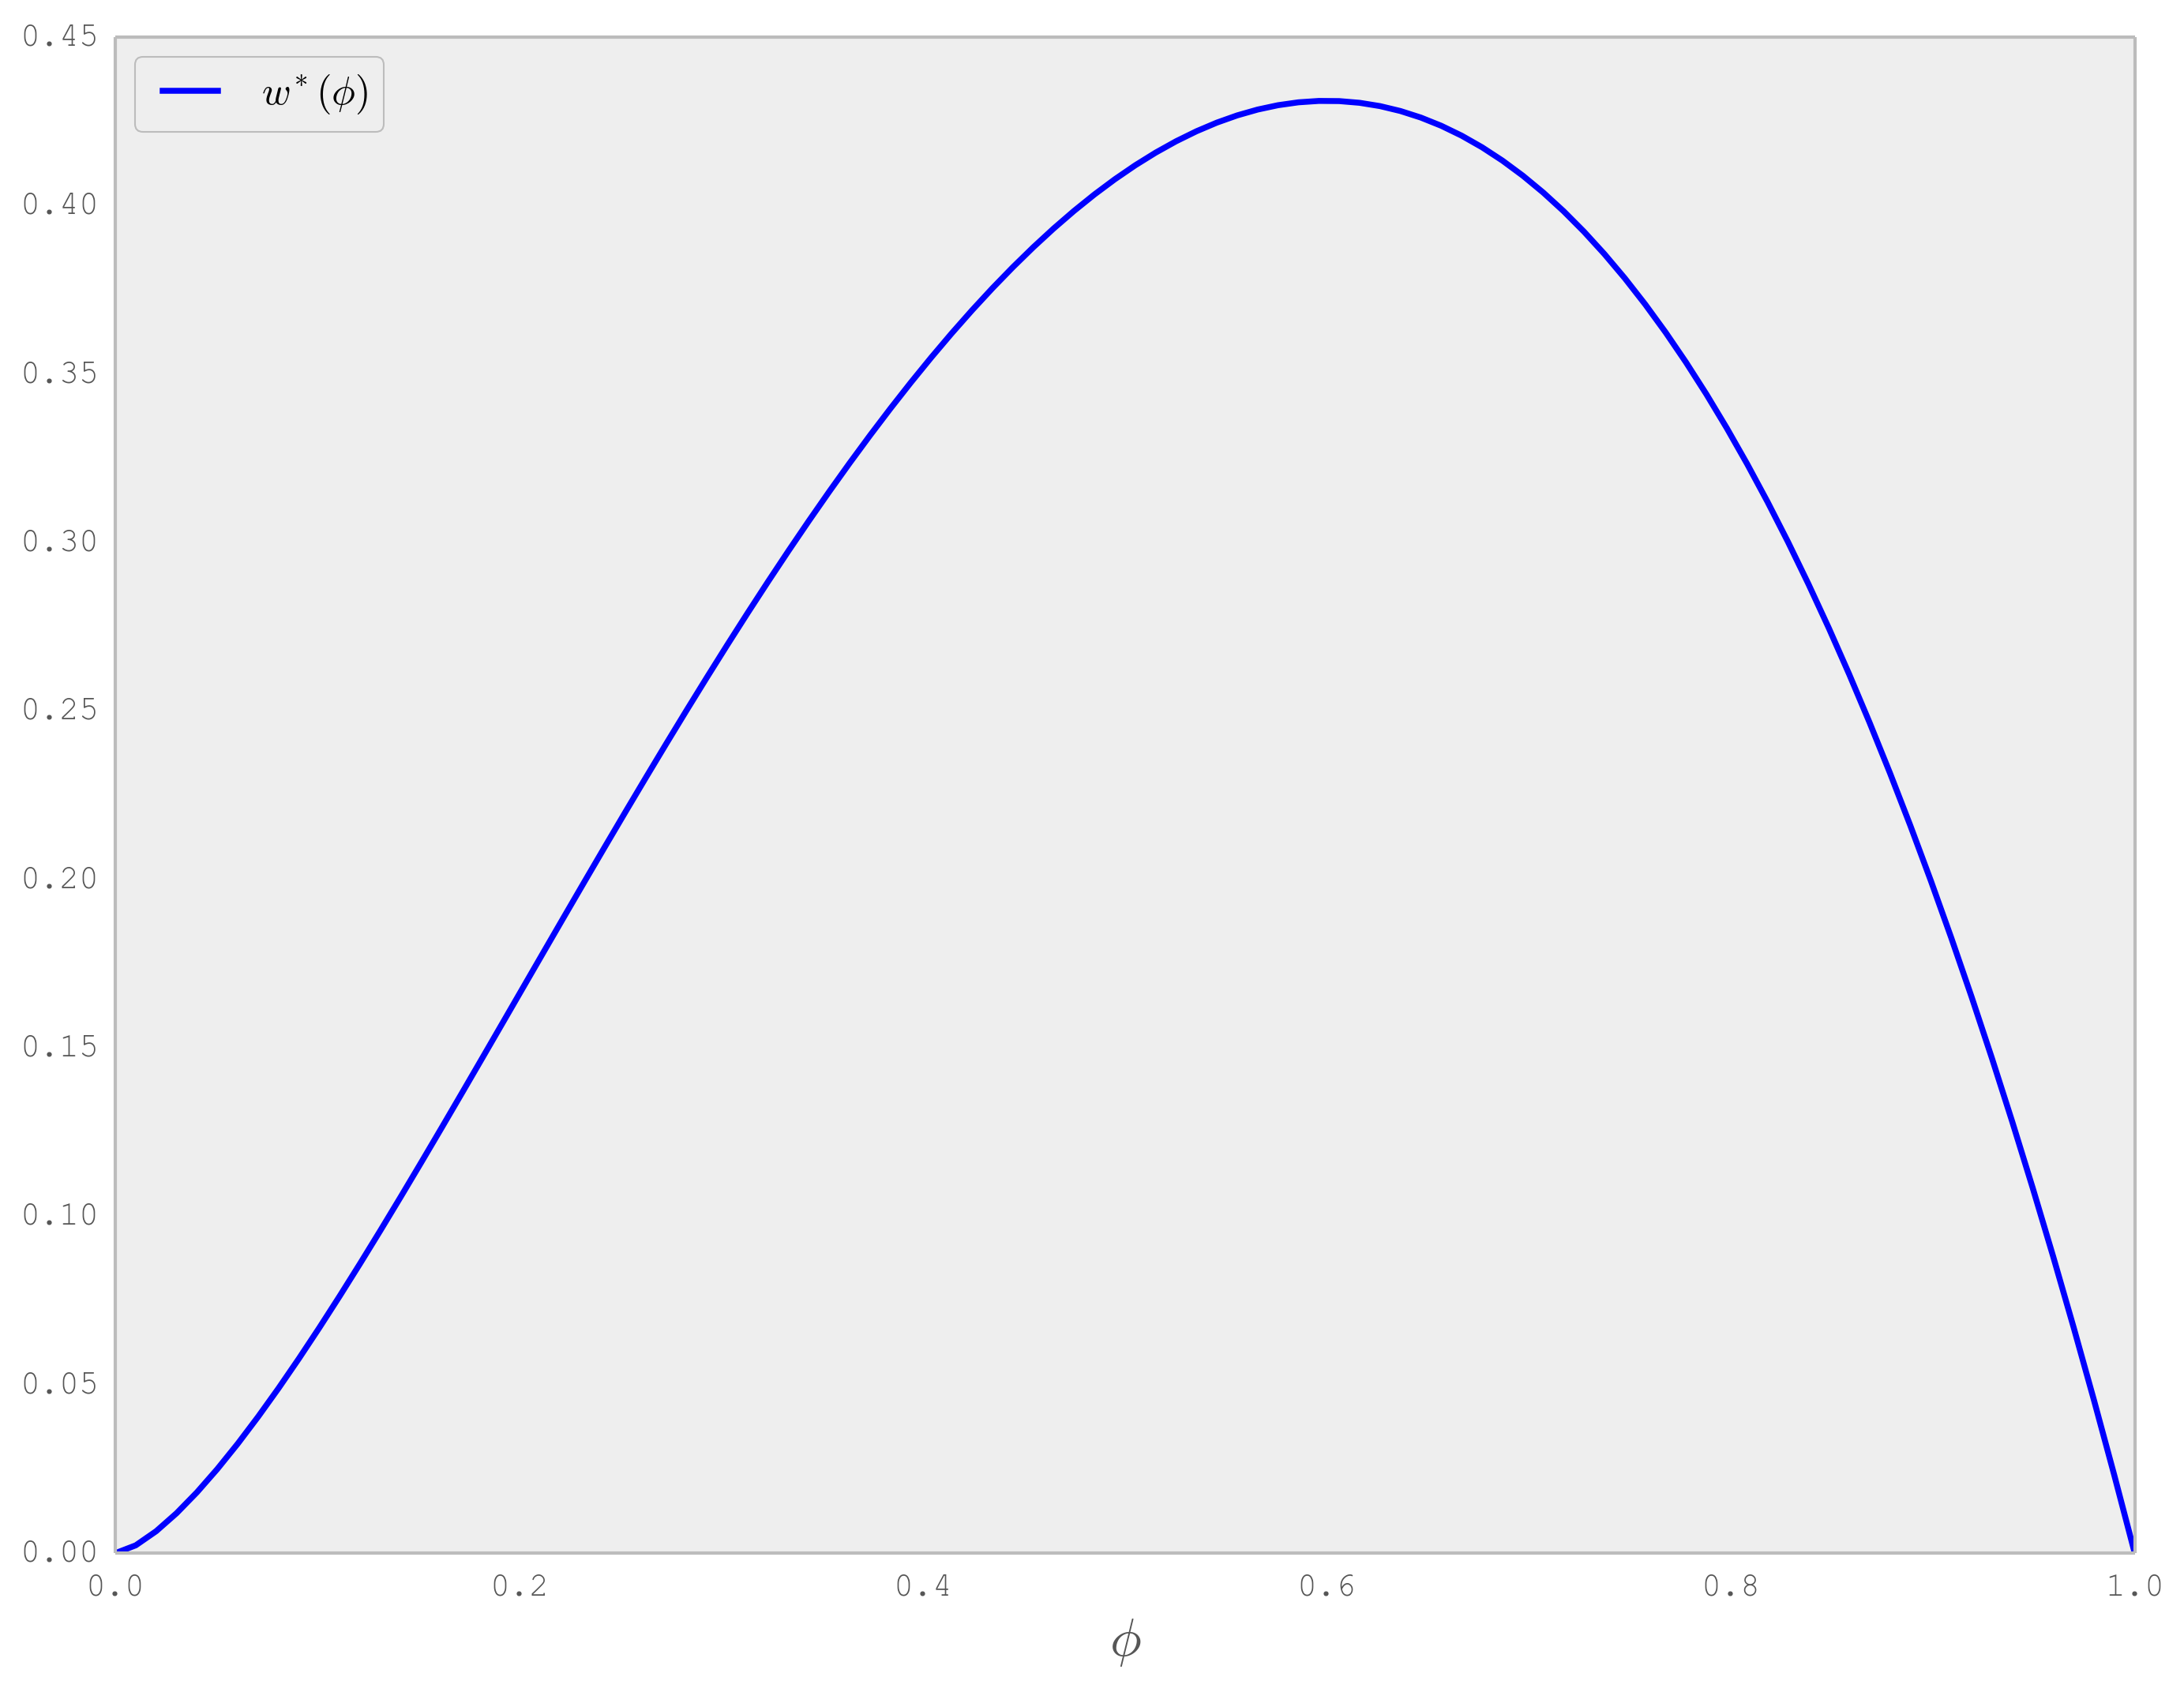

In [4]:
plt.close("all")
wp = JvWorker(grid_size=25)

xbar(phi) = (wp.A * phi^wp.alpha)^(1.0 / (1.0 - wp.alpha))

phi_grid = linspace(0, 1, 100)

fig, ax = subplots()
ax[:set_xlabel](L"$\phi$", fontsize=16)
ax[:plot](phi_grid, [xbar(phi) * (1 - phi) for phi in phi_grid], "b-", 
          label=L"$w^*(\phi)$")
ax[:legend](loc="upper left")

plt.show()

Observe that the maximizer is around 0.6

This this is similar to the long run value for $\phi$ obtained
in exercise 1

Hence the behaviour of the infinitely patent worker is similar to that of the
worker with $\beta = 0.96$

This seems reasonable, and helps us confirm that our dynamic programming
solutions are probably correct
